In [4]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# currently: 0, 0
circuit.x(0)
# 1, 0
circuit.cx(0,1) # cnot, controlled not. Flips 2nd qubit value IF first qubit is 1
# 1, 1
circuit.measure([0, 1],[0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [5]:
circuit.draw(output="mpl")

ImportError: The class MatplotlibDrawer needs pylatexenc. to install, run "pip install pylatexenc".

In [6]:
from qiskit import IBMQ
IBMQ.save_account("f1d57602f5f37528ee7e80bd83432251174958f2d8d77ed6a24eca7b8d806f333f710e6d7ad7cb5a9b0672c92c1875db109b25069d3adabd054b48592fa14387")

configrc.store_credentials:WARNING:2021-05-24 11:33:36,756: Credentials already present. Set overwrite=True to overwrite.


In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

In [21]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmqx2")
job  = q.execute(circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


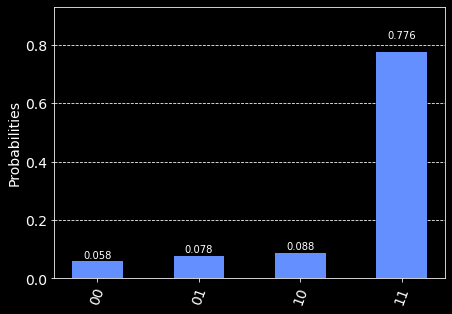

In [22]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

In [24]:
backend = provider.get_backend("ibmq_qasm_simulator")
circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# currently: 0, 0
circuit.h(0)
# 1, 0
circuit.cx(0,1) # cnot, controlled not. Flips 2nd qubit value IF first qubit is 1
# 1, 1
circuit.measure([0, 1],[0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [25]:
job  = q.execute(circuit, backend = backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


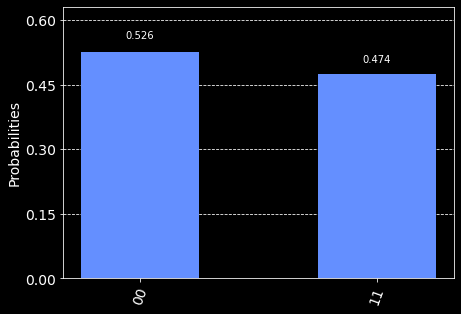

In [26]:
style.use("dark_background")
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

In [27]:
from qiskit import Aer #simulator framework
sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [28]:
job  = q.execute(circuit, backend = sim_backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


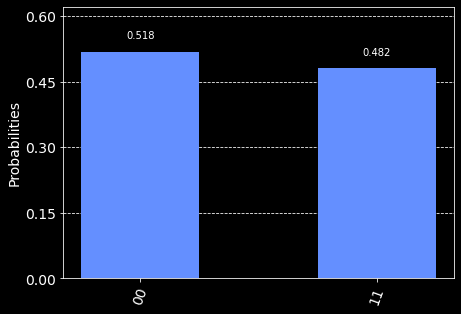

In [29]:
style.use("dark_background")
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])